# Transformada de Fourier para Muestras No Uniformes

## Descripción del caso

En muchos escenarios prácticos, los datos no se adquieren a intervalos regulares:

- Mediciones científicas con sensores que fallan intermitentemente
- Datos astronómicos dependientes de condiciones de observación
- Muestreos adaptativos donde la frecuencia varía según el contenido
- Registros históricos con irregularidades temporales

## Comparativo: Fourier Uniforme vs No Uniforme

| Característica          | Fourier Uniforme (DFT)          | Fourier No Uniforme (NUDFT)          |
|-------------------------|--------------------------------|--------------------------------------|
| Espaciado muestral      | Regular (Δt constante)         | Irregular (Δt variable)              |
| Complejidad computacional | O(N log N) con FFT           | O(N²) o mayor                       |
| Implementación          | Algoritmos optimizados (FFT)   | Cálculo matricial directo            |
| Precisión espectral     | Exacta para señales periódicas | Depende del método de aproximación  |
| Casos de aplicación     | Señales muestreadas uniformemente | Datos experimentales irregulares   |

## Formulación matemática

### Fourier Uniforme (DFT)

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j2\pi kn/N} \quad \text{para} \quad k = 0,\ldots,N-1
$$

### Fourier No Uniforme (NUDFT)

$$
X(\omega) = \sum_{n=0}^{N-1} x[n] \cdot e^{-j\omega t[n]}
$$

donde \( t[n] \) son los tiempos de muestreo no uniformes.


# Fourier No Uniforme (NUDFT)

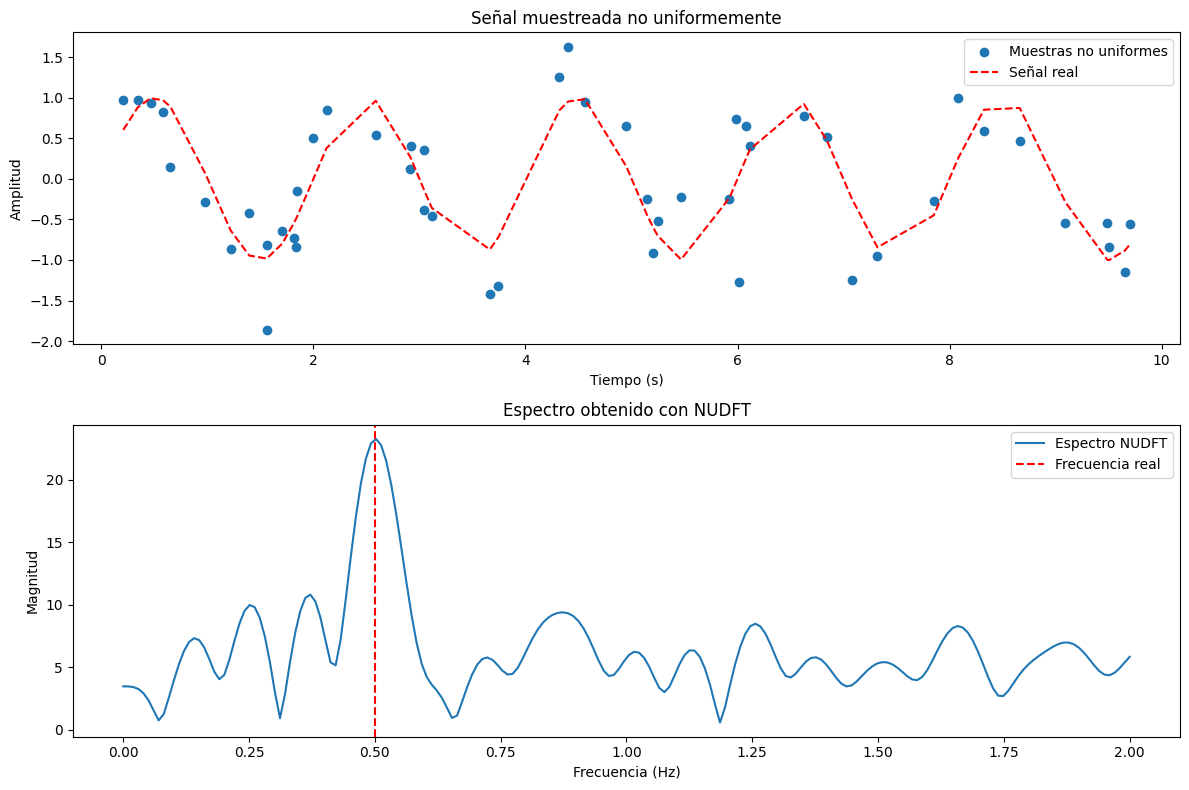

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def nudft(signal, times, freqs):
    """
    Transformada de Fourier no uniforme
    signal: valores de la señal
    times: tiempos de muestreo (no uniformes)
    freqs: frecuencias a evaluar
    """
    omega = 2 * np.pi * freqs
    exponents = np.exp(-1j * np.outer(omega, times))
    return np.dot(exponents, signal)

# Datos no uniformes
np.random.seed(42)
N = 50
t_nonuniform = np.sort(np.random.uniform(0, 10, N))
f_signal = 0.5  # Hz
signal_nonuniform = np.sin(2 * np.pi * f_signal * t_nonuniform) + 0.5 * np.random.randn(N)

# Cálculo de frecuencias
freqs = np.linspace(0, 2, 200)
spectrum = nudft(signal_nonuniform, t_nonuniform, freqs)

# Graficación
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.scatter(t_nonuniform, signal_nonuniform, label='Muestras no uniformes')
plt.plot(t_nonuniform, np.sin(2 * np.pi * f_signal * t_nonuniform), 'r--', label='Señal real')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Señal muestreada no uniformemente')

plt.subplot(2, 1, 2)
plt.plot(freqs, np.abs(spectrum), label='Espectro NUDFT')
plt.axvline(f_signal, color='r', linestyle='--', label='Frecuencia real')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.legend()
plt.title('Espectro obtenido con NUDFT')

plt.tight_layout()
plt.show()

# Fourier Uniforme (DFT/FFT)

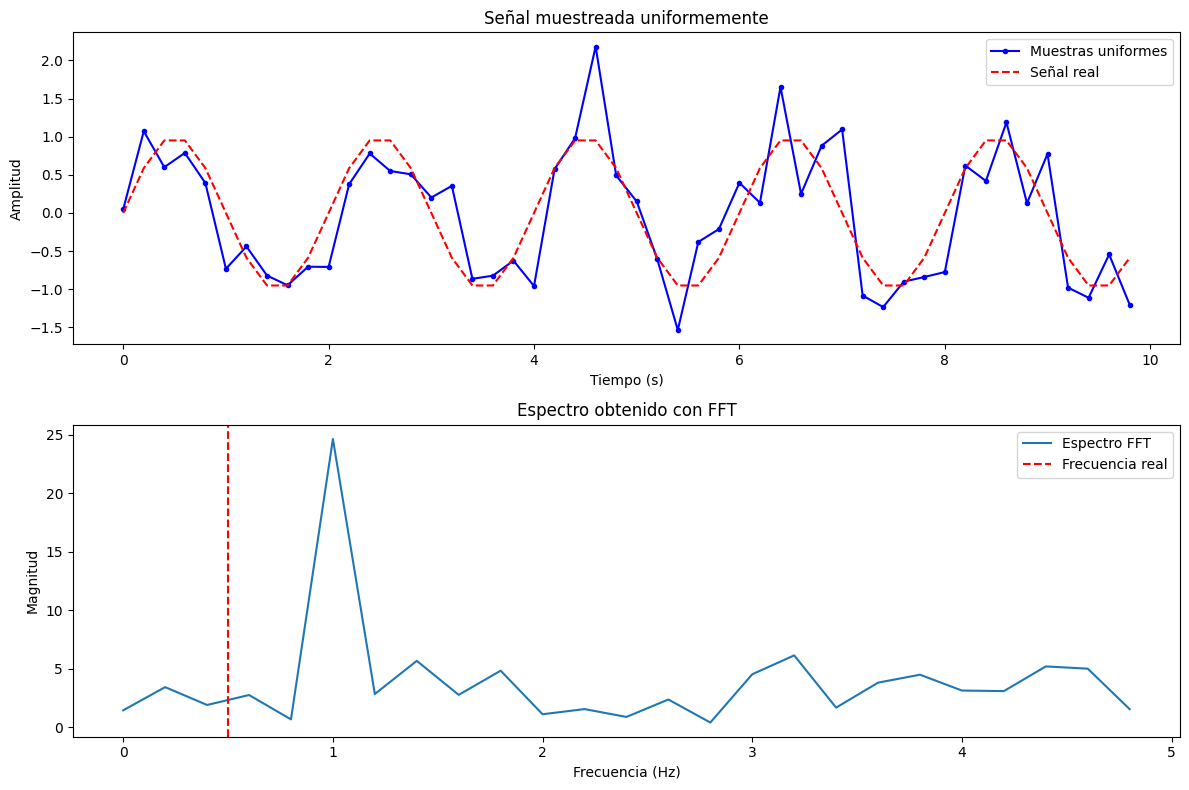

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 10  # Frecuencia de muestreo (Hz)
T = 10   # Duración (s)
N = 50   # Número de muestras
t_uniform = np.linspace(0, T, N, endpoint=False)
f_signal = 0.5  # Hz
signal_uniform = np.sin(2 * np.pi * f_signal * t_uniform) + 0.5 * np.random.randn(N)

# FFT convencional
spectrum_fft = np.fft.fft(signal_uniform)
freqs_fft = np.fft.fftfreq(N, d=1/fs)

# Graficación
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t_uniform, signal_uniform, 'b.-', label='Muestras uniformes')
plt.plot(t_uniform, np.sin(2 * np.pi * f_signal * t_uniform), 'r--', label='Señal real')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Señal muestreada uniformemente')

plt.subplot(2, 1, 2)
positive_freqs = freqs_fft[:N//2]
positive_spectrum = np.abs(spectrum_fft[:N//2])
plt.plot(positive_freqs, positive_spectrum, label='Espectro FFT')
plt.axvline(f_signal, color='r', linestyle='--', label='Frecuencia real')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.legend()
plt.title('Espectro obtenido con FFT')

plt.tight_layout()
plt.show()